In [1]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import re
import time
import pickle
pd.set_option('display.max_colwidth', 200)

In [8]:
data = pd.read_excel('PPMdata.xlsx')

In [9]:
data.head(10)

,Index,Sub-category,Category,Sentence,Sentiment
0,402482,"Waiting (Phone, Payment or General)",Representative/Agent,Prior authorizations are very difficult to obtain and having to wait up to 15 business days for a surgical approval is very difficult for both staff and patients.,1.0
1,402483,"Waiting (Phone, Payment or General)",Representative/Agent,"To use time efficiently, I need to be able to get my surgery scheduled filled. That means if I have a patient cancel their surgery, I need to be able to fill that spot with someone else. Often I h...",1.0
2,402484,"Waiting (Phone, Payment or General)",Representative/Agent,The 15 business day wait for authorizations.,1.0
3,402485,"Waiting (Phone, Payment or General)",Representative/Agent,The new online authorization tool is not very user friendly. The ease of authorizing procedures and diagnostics needs to be easier. UHC should not force us to use every CPT code possible for a kne...,1.0
4,402486,"Waiting (Phone, Payment or General)",Representative/Agent,"Prior authorization, medication questions. Needs to be more thorough. There needs to be a fax number that we can provide additional info immediately instead of having to wait for a denial first.",1.0
5,402539,Repetition,Representative/Agent,We have noted a lack of communication and coordination within UnitedHealthcare that holds up the claims process. This seems to be increasing and creates large outstanding accounts receivables for ...,1.0
6,402540,Repetition,Representative/Agent,Increase fee schedules. Streamline prior authorization request. Have dedicated phone representatives available to speak to physician office representatives without having to be transferred numerou...,1.0
7,402541,Repetition,Representative/Agent,"UHC frequent and repetitive and abuse of HEDIS reports, make practicing medicine very difficult as it is time consuming.",1.0
8,402542,Repetition,Representative/Agent,"Splitting claims into separate line items and paying them at different times makes posting of payments and verification of payment very difficult. Reporting NDC numbers has not gone smoothly, clai...",1.0
9,402543,Repetition,Representative/Agent,Need to be able to speak with person to solve issues. Ongoing issues now that we can't get help with. Would like to have a personal representative. Flu vaccine not being reimbursed.,1.0


In [10]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [11]:
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [12]:
print (data.shape)
data = data[pd.notnull(data.Sentence)]
print (data.shape)

(1430, 5)
(1089, 5)


In [13]:
data['clean_sentence'] = lemmatization(data['Sentence'])

In [14]:
data.head(10)

,Index,Sub-category,Category,Sentence,Sentiment,clean_sentence
0,402482,"Waiting (Phone, Payment or General)",Representative/Agent,Prior authorizations are very difficult to obtain and having to wait up to 15 business days for a surgical approval is very difficult for both staff and patients.,1.0,prior authorization be very difficult to obtain and have to wait up to 15 business day for a surgical approval be very difficult for both staff and patient .
1,402483,"Waiting (Phone, Payment or General)",Representative/Agent,"To use time efficiently, I need to be able to get my surgery scheduled filled. That means if I have a patient cancel their surgery, I need to be able to fill that spot with someone else. Often I h...",1.0,"to use time efficiently , -PRON- need to be able to get -PRON- surgery schedule fill . that mean if -PRON- have a patient cancel -PRON- surgery , -PRON- need to be able to fill that spot with some..."
2,402484,"Waiting (Phone, Payment or General)",Representative/Agent,The 15 business day wait for authorizations.,1.0,the 15 business day wait for authorization .
3,402485,"Waiting (Phone, Payment or General)",Representative/Agent,The new online authorization tool is not very user friendly. The ease of authorizing procedures and diagnostics needs to be easier. UHC should not force us to use every CPT code possible for a kne...,1.0,the new online authorization tool be not very user friendly . the ease of authorize procedure and diagnostic need to be easy . UHC should not force -PRON- to use every CPT code possible for a knee...
4,402486,"Waiting (Phone, Payment or General)",Representative/Agent,"Prior authorization, medication questions. Needs to be more thorough. There needs to be a fax number that we can provide additional info immediately instead of having to wait for a denial first.",1.0,"prior authorization , medication question . need to be more thorough . there need to be a fax number that -PRON- can provide additional info immediately instead of have to wait for a denial first ."
5,402539,Repetition,Representative/Agent,We have noted a lack of communication and coordination within UnitedHealthcare that holds up the claims process. This seems to be increasing and creates large outstanding accounts receivables for ...,1.0,-PRON- have note a lack of communication and coordination within UnitedHealthcare that hold up the claim process . this seem to be increase and create large outstanding account receivable for the ...
6,402540,Repetition,Representative/Agent,Increase fee schedules. Streamline prior authorization request. Have dedicated phone representatives available to speak to physician office representatives without having to be transferred numerou...,1.0,increase fee schedule . streamline prior authorization request . Have dedicate phone representative available to speak to physician office representative without have to be transfer numerous time ...
7,402541,Repetition,Representative/Agent,"UHC frequent and repetitive and abuse of HEDIS reports, make practicing medicine very difficult as it is time consuming.",1.0,"UHC frequent and repetitive and abuse of HEDIS report , make practice medicine very difficult as -PRON- be time consume ."
8,402542,Repetition,Representative/Agent,"Splitting claims into separate line items and paying them at different times makes posting of payments and verification of payment very difficult. Reporting NDC numbers has not gone smoothly, clai...",1.0,"splitting claim into separate line item and pay -PRON- at different time make post of payment and verification of payment very difficult . report NDC number have not go smoothly , claim be deny in..."
9,402543,Repetition,Representative/Agent,Need to be able to speak with person to solve issues. Ongoing issues now that we can't get help with. Would like to have a personal representative. Flu vaccine not being reimbursed.,1.0,need to be able to speak with person to solve issue . ongoing issue now that -PRON- can not get help with .

In [15]:
import tensorflow_hub as hub
import tensorflow as tf

elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

W0912 17:11:32.964432  9692 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14
W0912 17:11:33.453134  9692 deprecation.py:323] From c:\users\asengup6\softwares\anaconda\lib\site-packages\tensorflow\python\ops\control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [16]:
#x = [data.clean_sentence.iloc[0]]

# Extract ELMo features 
#embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

In [21]:
def elmo_vectors(x):
  embeddings = elmo([x], signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(embeddings) #tf.reduce_mean(embeddings,1)

In [22]:
sample_embedding = elmo_vectors(data.clean_sentence.iloc[0])

In [23]:
sample_embedding.shape

(1, 29, 1024)

In [24]:
sample_embedding[0]

array([[ 0.72288114,  0.25734472,  0.11489936, ...,  0.43567318,
        -0.88855004, -0.18030553],
       [-1.2963636 ,  0.47019878, -0.0572387 , ...,  0.67629975,
         0.33992383,  0.31777692],
       [-0.1810832 ,  0.27138102,  0.5023655 , ...,  0.21582775,
         0.05349024,  0.06218349],
       ...,
       [ 0.07860245,  0.0262847 , -1.057676  , ...,  0.08232624,
        -0.20372224,  0.37205875],
       [ 0.3553758 , -0.3562972 , -0.17617223, ...,  0.33579278,
        -0.27441198,  0.11936717],
       [-0.78443825, -0.05065828, -0.6342577 , ..., -0.08025225,
         0.03607743,  0.11280707]], dtype=float32)

In [37]:
x = data.clean_sentence.iloc[0]

x

'prior authorization be very difficult to obtain and have to wait up to 15 business day for a surgical approval be very difficult for both staff and patient .'

In [33]:
from sklearn.metrics.pairwise import cosine_similarity

distances = cosine_similarity(sample_embedding[0])

In [38]:
for i in range(sample_embedding.shape[1]):
    print (x.split()[i],x.split()[distances[i][np.arange(0,i).tolist()+np.arange(i+1,sample_embedding.shape[1]).tolist()].argmax()])

prior for
authorization surgical
be approval
very be
difficult very
to have
obtain and
and to
have be
to to
wait wait
up wait
to up
15 15
business business
day business
for for
a a
surgical a
approval authorization
be be
very very
difficult difficult
for staff
both both
staff and
and for
patient staff
. for


In [24]:
data = data.sample(frac=1)

In [26]:
all_embeddings = np.array([elmo_vectors(data.clean_sentence.iloc[i]).reshape(1024) for i in tqdm(range(100))])



  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

  1%|▊                                                                               | 1/100 [00:46<1:17:18, 46.86s/it]

  2%|█▌                                                                              | 2/100 [01:31<1:15:31, 46.24s/it]

  3%|██▍                                                                             | 3/100 [02:20<1:16:06, 47.07s/it]

  4%|███▏                                                                            | 4/100 [03:06<1:14:55, 46.82s/it]

  5%|████                                                                            | 5/100 [03:56<1:15:29, 47.67s/it]

  6%|████▊                                                                           | 6/100 [04:46<1:15:47, 48.38s/it]

  7%|█████▌                                                                          | 7/100 [05:40<1:17:22, 49.92s/it]

  8%|██████▍                  

In [27]:
all_embeddings.shape

(100, 1024)

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
tsne = TSNE(n_components=2,learning_rate=200)
tsne_embedding = tsne.fit_transform(all_embeddings)

In [43]:
vis_data = pd.DataFrame()
vis_data['x'] = tsne_embedding[:,0]
vis_data['y'] = tsne_embedding[:,1]
vis_data['topic'] = data['Category'].iloc[:100].values

In [44]:
vis_data.head(50)

,x,y,topic
0,-2.533960,4.814358,Coverage
1,-0.961638,6.181541,Referral
2,1.517373,2.234061,Authorization
3,-2.659354,3.750258,Payment
4,1.756706,0.667271,Communication
5,3.005795,1.613590,Representative/Agent
6,-2.116165,2.062590,Payment
7,-2.538293,1.025674,Payment
8,0.481339,2.143716,Medical Coding Issues
9,-3.662808,4.437164,NaN


<Figure size 432x432 with 0 Axes>

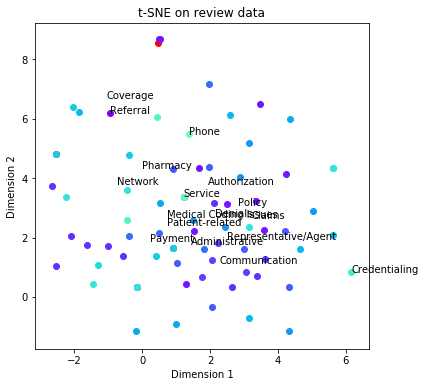

In [46]:
colors = cm.rainbow(np.linspace(0, 1, data['Sub-category'].iloc[:100].nunique()))
plt.figure(figsize=(6,6))
for j,i in enumerate(data['Category'].iloc[:100].unique()):
    if len(vis_data[vis_data.topic == i]) > 0:
        plt.scatter(vis_data[vis_data.topic == i]['x'],vis_data[vis_data.topic == i]['y'],color=colors[j-1])
        plt.annotate(vis_data[vis_data.topic == i].topic.iloc[0],(vis_data[vis_data.topic == i]['x'].mean(),vis_data[vis_data.topic == i]['y'].mean()))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on review data')
plt.show(block=False)